## Imports 

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

## Dataset

In [52]:
pumpkins = pd.read_csv('pumkins_base.csv')
pumpkins.head()

,BALTIMORE,,24 inch bins,,,,4/29/17,270,280,270,...,.1,.1,,.2,,,.3,,E,.1
0,BALTIMORE,,24 inch bins,,,,5/6/17,270,280,270,...,,,,,,,,,E,
1,BALTIMORE,,24 inch bins,HOWDEN TYPE,,,9/24/16,160,160,160,...,ORANGE,,,,,,,,N,
2,BALTIMORE,,24 inch bins,HOWDEN TYPE,,,9/24/16,160,160,160,...,ORANGE,,,,,,,,N,
3,BALTIMORE,,24 inch bins,HOWDEN TYPE,,,11/5/16,90,100,90,...,ORANGE,,,,,,,,N,
4,BALTIMORE,,24 inch bins,HOWDEN TYPE,,,11/12/16,90,100,90,...,ORANGE,,,,,,,,N,


## Nettoyer le dataset

In [53]:
# drop columns City Name
pumpkins = pumpkins.drop(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade', 'Mostly Low', 'Mostly High', 'Origin', 'Origin District', 'Item Size', 'Color', 'Environment', 'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop', 'Repack'], axis=1)



KeyError: "['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade', 'Mostly Low', 'Mostly High', 'Origin', 'Origin District', 'Item Size', 'Color', 'Environment', 'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop', 'Repack'] not found in axis"

## Convertir la date en format 365

In [54]:
# show the date column
pumpkins['Date']
#create a new column called date_daily
pumpkins['date_daily'] = pd.to_datetime(pumpkins['Date'])
#show the new column
pumpkins['date_daily']
#transform data from date_daily to 365 days date format
pumpkins['date_daily'] = pumpkins['date_daily'].dt.dayofyear
#show date_daily and the date column
pumpkins[['date_daily', 'Date']]


KeyError: 'Date'

## Faire la moyenne des prix

In [ ]:
#create a new column called average_price
pumpkins['average_price'] = (pumpkins['High Price'] + pumpkins['Low Price']) / 2
pumpkins[['High Price', 'Low Price', 'average_price']]

,High Price,Low Price,average_price
0,60.0,50.0,55.0
1,60.0,50.0,55.0
2,60.0,50.0,55.0
3,60.0,50.0,55.0
4,60.0,50.0,55.0
...,...,...,...
1752,135.0,135.0,135.0
1753,275.0,275.0,275.0
1754,275.0,275.0,275.0
1755,275.0,275.0,275.0


Supprimer les lignes

## Supprimer les unités peu utilisées

In [ ]:
pumpkins = pumpkins[pumpkins['Package'] != '20 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '35 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != 'bushel cartons']
pumpkins = pumpkins[pumpkins['Package'] != '40 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '1 1/9 bushel crates']
pumpkins = pumpkins[pumpkins['Package'] != 'each']
pumpkins = pumpkins[pumpkins['Package'] != 'bins']
pumpkins = pumpkins[pumpkins['Package'] != '50 lb sacks']
pumpkins = pumpkins[pumpkins['Package'] != 'bushel baskets']
pumpkins = pumpkins[pumpkins['Package'] != '22 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '50 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '20 lb cartons']
# count the number of diferent unique values in the Package column
pumpkins['Package'].value_counts()

36 inch bins            663
24 inch bins            551
1/2 bushel cartons      234
1 1/9 bushel cartons    117
Name: Package, dtype: int64

## Séparer les valeurs

In [ ]:
X = pumpkins['date_daily'].to_numpy().reshape(-1,1)
y = pumpkins['average_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lin_reg = LinearRegression().fit(X_train,y_train)


KeyError: 'date_daily'

## Calculs des indicateurs

In [ ]:
pred = lin_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {rmse:3.3} ({rmse/np.mean(pred)*100:3.3}%)')

score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 81.3 (58.5%)
Model determination:  0.02686692877242991


## Créer le graphique

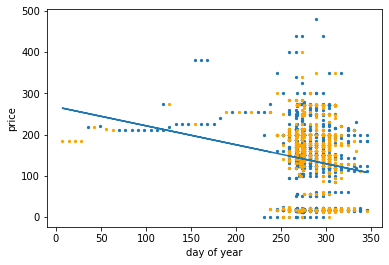

In [ ]:
plt.scatter(X_train,y_train, s = 5) #Training data
plt.scatter(X_test,y_test, color = "orange", s = 5) #Test data
plt.plot(X_test, pred) #Regression line
plt.xlabel("day of year")
plt.ylabel("price")
plt.show()